<a href="https://colab.research.google.com/github/SurbhiMotwani23/1stpullreq/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import datetime as dt
from pandas.plotting import register_matplotlib_converters

In [12]:
daily = pd.read_csv("/content/drive/MyDrive/archive (1)/salesdaily.csv")
weekly = pd.read_csv("/content/drive/MyDrive/archive (1)/salesweekly.csv")
monthly = pd.read_csv("/content/drive/MyDrive/archive (1)/salesmonthly.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
print("Daily data shape: {}".format(daily.shape))
print("Weekly data shape: {}".format(weekly.shape))
print("Monthly data shape: {}".format(monthly.shape))

Daily data shape: (2106, 13)
Weekly data shape: (302, 9)
Monthly data shape: (70, 9)


Descriptive Statistics of the data



In [14]:
daily.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [15]:
weekly.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [16]:
monthly.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


Data Pre-Processing
Checking for Null Values

In [17]:
daily.isnull().sum()


,0
datum,0
M01AB,0
M01AE,0
N02BA,0
N02BE,0
N05B,0
N05C,0
R03,0
R06,0
Year,0


In [18]:
weekly.isnull().sum()


,0
datum,0
M01AB,0
M01AE,0
N02BA,0
N02BE,0
N05B,0
N05C,0
R03,0
R06,0


Converting data type of 'datum' column from object to datetime



In [20]:
daily['datum'] = pd.to_datetime(daily['datum'], format = '%m/%d/%Y')
weekly['datum'] = pd.to_datetime(weekly['datum'], format = '%m/%d/%Y')
monthly['datum'] = pd.to_datetime(monthly['datum'], format = '%Y-%m-%d')

#Setting date as index of the dataset
#daily.set_index('datum', inplace=True)
#weekly.set_index('datum', inplace=True)
#monthly.set_index('datum', inplace=True)

Monthly Data Forecasting


In [21]:
#Extracting date, month and year into separate columns for ease of EDA

monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day

In [22]:
#Setting date as index of the dataset
monthly.set_index('datum', inplace=True)

In [23]:
#Creating a numerical column list from all the columns in the 'monthly' table
monthly.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'year', 'month', 'day'],
      dtype='object')

In [24]:
num_col_list = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']


EDA


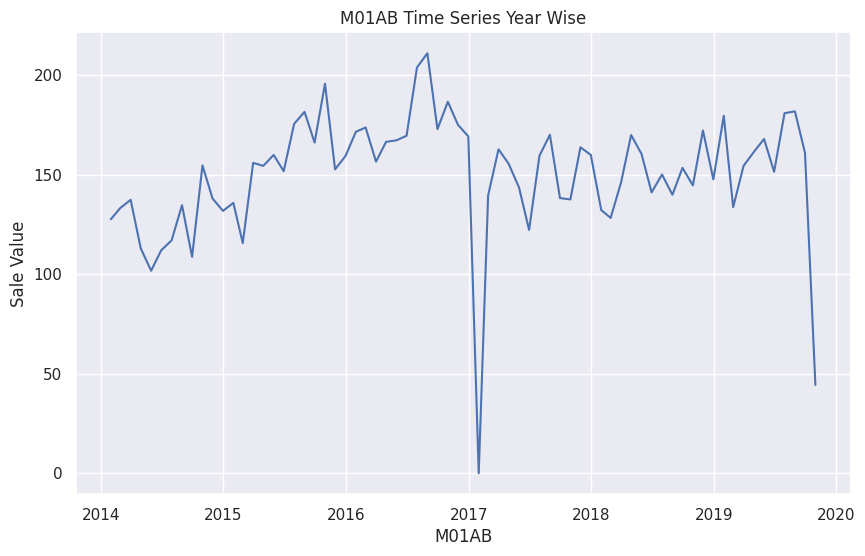

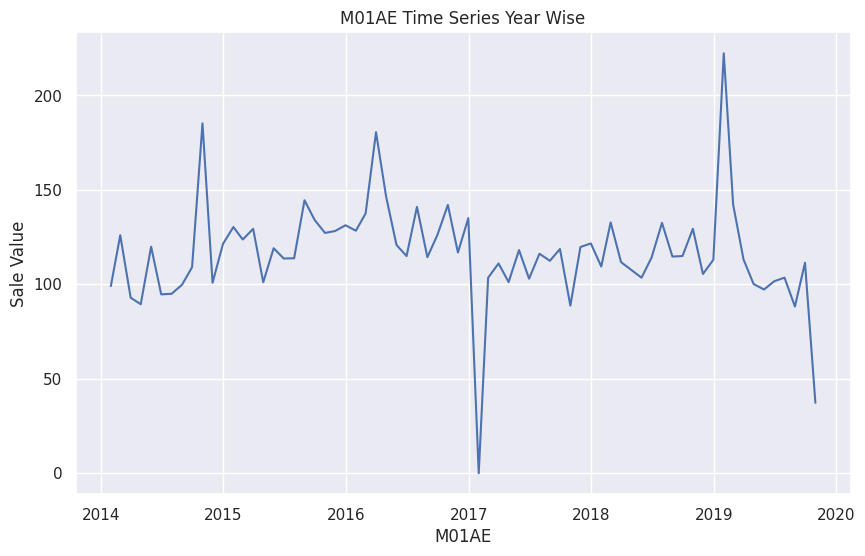

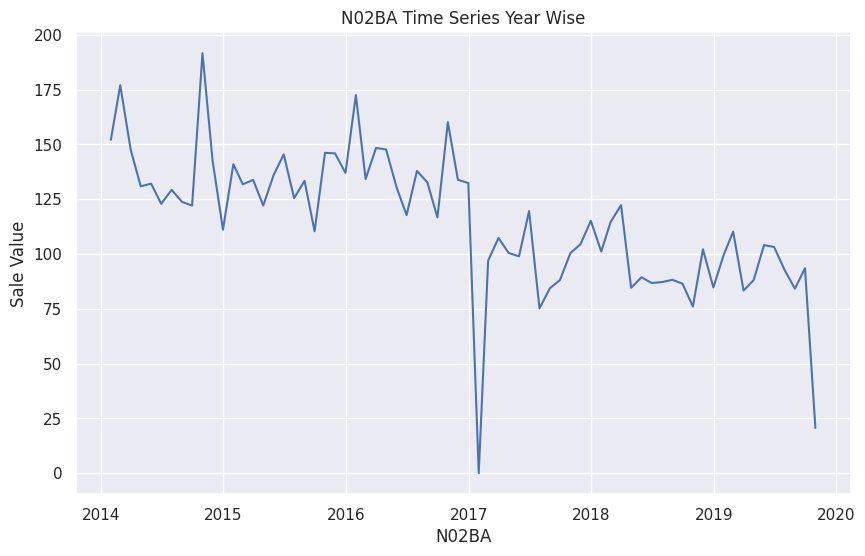

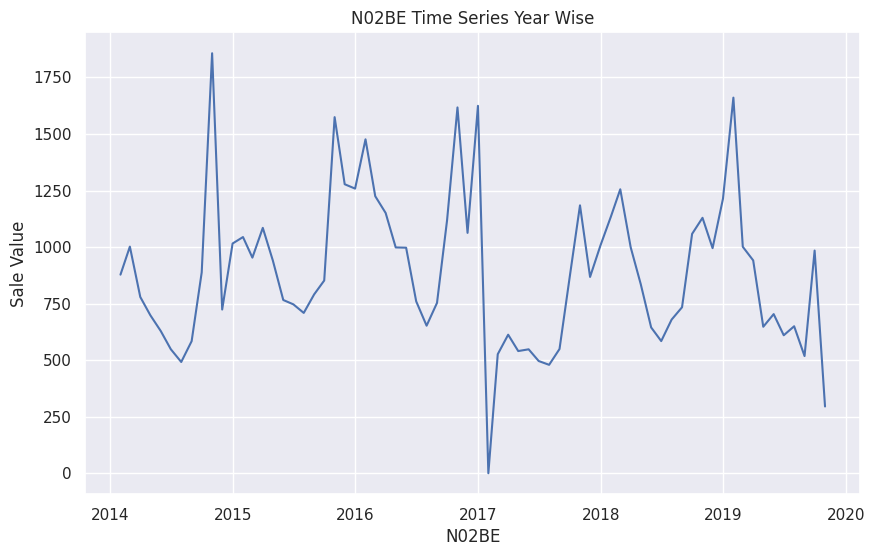

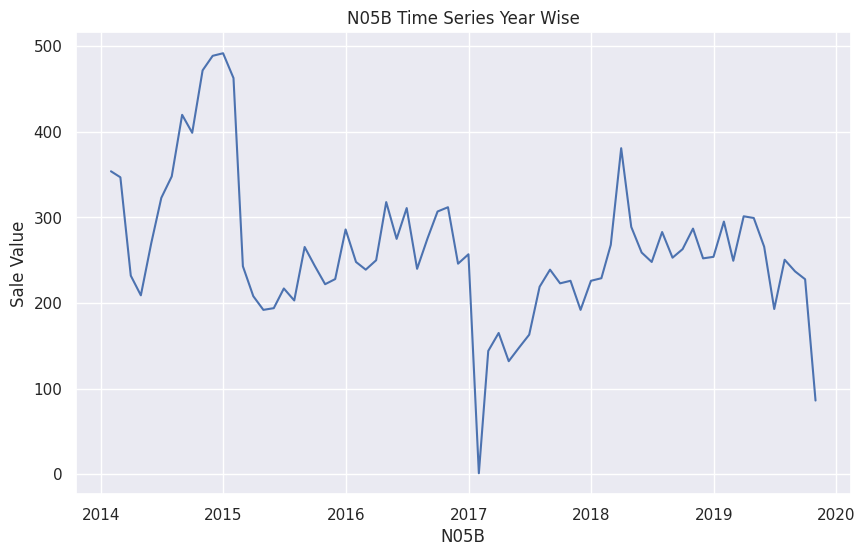

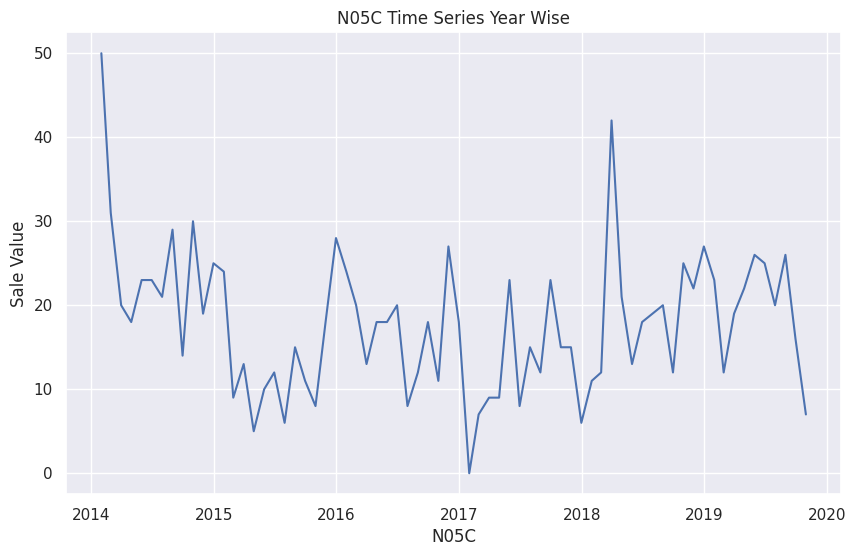

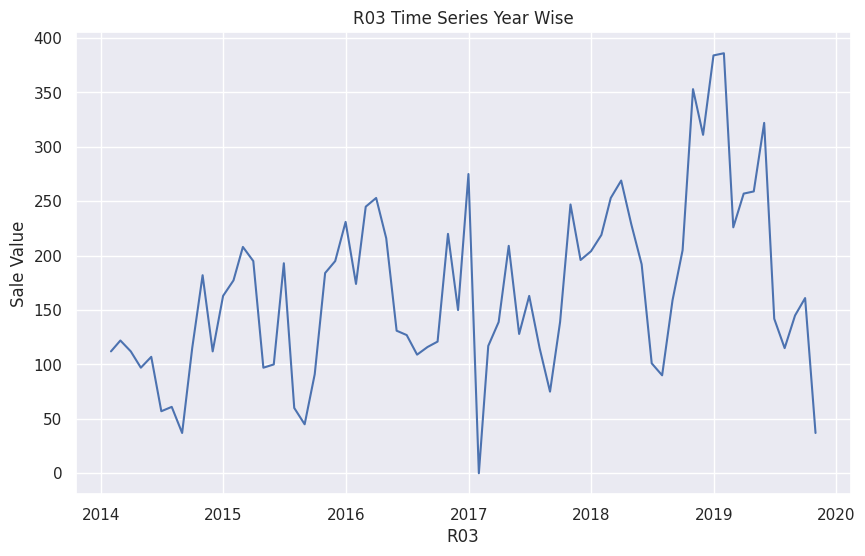

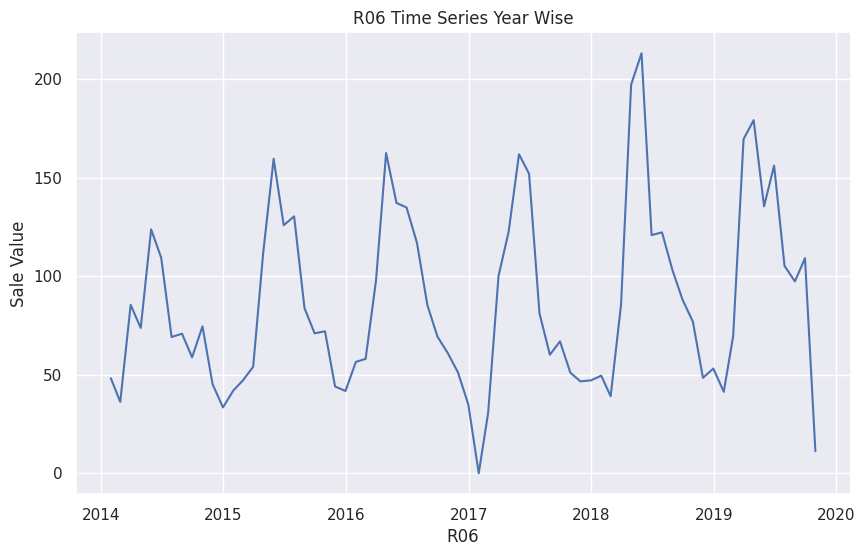

In [25]:
#Plotting timeseries of all the drug columns year wise

for column in num_col_list:
    plt.figure(figsize=(10,6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series Year Wise')
    plt.xlabel(column)
    plt.ylabel('Sale Value')
    plt.show()

Calculating total monthly sales by summing sales of all the drugs



In [26]:
monthly['total_sales'] = 0
for cols in num_col_list:
    monthly['total_sales']+= monthly[cols]

In [27]:
import plotly.express as px
import pandas as pd

# Create data for the Gantt chart with updated dates
data = [
    {"Task": "Data Collection", "Start": "2025-01-20", "Finish": "2025-01-30", "Resource": "Data"},
    {"Task": "Data Preprocessing", "Start": "2025-01-31", "Finish": "2025-02-10", "Resource": "Preprocessing"},
    {"Task": "Model Training", "Start": "2025-02-11", "Finish": "2025-03-05", "Resource": "Model"},
    {"Task": "Model Evaluation", "Start": "2025-03-06", "Finish": "2025-03-15", "Resource": "Evaluation"},
    {"Task": "Forecasting", "Start": "2025-03-16", "Finish": "2025-04-05", "Resource": "Forecasting"},
    {"Task": "Final Report", "Start": "2025-04-06", "Finish": "2025-04-20", "Resource": "Reporting"}
]

# Convert data into DataFrame
df = pd.DataFrame(data)

# Create the Gantt chart
fig = px.timeline(df,
                  x_start="Start",
                  x_end="Finish",
                  y="Task",
                  color="Resource",
                  title="Gantt Chart for Drug Demand Forecasting Project",
                  labels={"Task": "Project Tasks", "Start": "Start Date", "Finish": "End Date"})

# Update layout for better visualization
fig.update_layout(showlegend=True, xaxis_title="Timeline", yaxis_title="Tasks", template="plotly_dark")

# Show the Gantt chart
fig.show()


In [37]:
# prompt: sudo apt-get update
#    sudo apt-get install graphviz libgraphviz-dev pkg-config

!sudo apt-get update
!sudo apt-get install graphviz libgraphviz-dev pkg-config


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,677 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,911 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,526 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,656 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/r

In [39]:
!pip install pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169680 sha256=829999ae3e52e1035d1dd1b08b2c65be2f1ba7f1f3d60416708ce71ffd5f035e
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


In [40]:
from graphviz import Digraph

# Create a new graph
dot = Digraph(comment='Work Breakdown Structure')

# Add the main task
dot.node('1', 'Drug Demand Forecasting Project')

# Add main tasks
dot.node('1.1', 'Data Collection')
dot.node('1.2', 'Data Preprocessing')
dot.node('1.3', 'Model Training')
dot.node('1.4', 'Model Evaluation')
dot.node('1.5', 'Forecasting')
dot.node('1.6', 'Final Report')

# Add subtasks under Data Preprocessing
dot.node('1.2.1', 'Cleaning and Transformation')
dot.node('1.2.2', 'Data Normalization')

# Add subtasks under Model Training
dot.node('1.3.1', 'Model Selection')
dot.node('1.3.2', 'Training the Model')

# Define relationships (edges) between parent and child tasks
dot.edge('1', '1.1')
dot.edge('1', '1.2')
dot.edge('1', '1.3')
dot.edge('1', '1.4')
dot.edge('1', '1.5')
dot.edge('1', '1.6')

dot.edge('1.2', '1.2.1')
dot.edge('1.2', '1.2.2')

dot.edge('1.3', '1.3.1')
dot.edge('1.3', '1.3.2')

# Render the graph
dot.render('WBS_Block_Diagram', format='png', view=True)


'WBS_Block_Diagram.png'

In [42]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Work Breakdown Structure')

# Add the main task (root node)
dot.node('1', 'Drug Demand Forecasting Project')

# Add main tasks (major tasks under the main project)
dot.node('1.1', 'Data Collection')
dot.node('1.2', 'Data Preprocessing')
dot.node('1.3', 'Model Training')
dot.node('1.4', 'Model Evaluation')
dot.node('1.5', 'Forecasting')
dot.node('1.6', 'Final Report')

# Add subtasks under Data Preprocessing
dot.node('1.2.1', 'Cleaning and Transformation')
dot.node('1.2.2', 'Data Normalization')

# Add subtasks under Model Training
dot.node('1.3.1', 'Model Selection')
dot.node('1.3.2', 'Training the Model')

# Define relationships (edges) between parent and child tasks
dot.edge('1', '1.1')
dot.edge('1', '1.2')
dot.edge('1', '1.3')
dot.edge('1', '1.4')
dot.edge('1', '1.5')
dot.edge('1', '1.6')

dot.edge('1.2', '1.2.1')
dot.edge('1.2', '1.2.2')

dot.edge('1.3', '1.3.1')
dot.edge('1.3', '1.3.2')

# Render the graph and save it as a PNG file
dot.render('WBS_Block_Diagram', format='png', view=True)


'WBS_Block_Diagram.png'

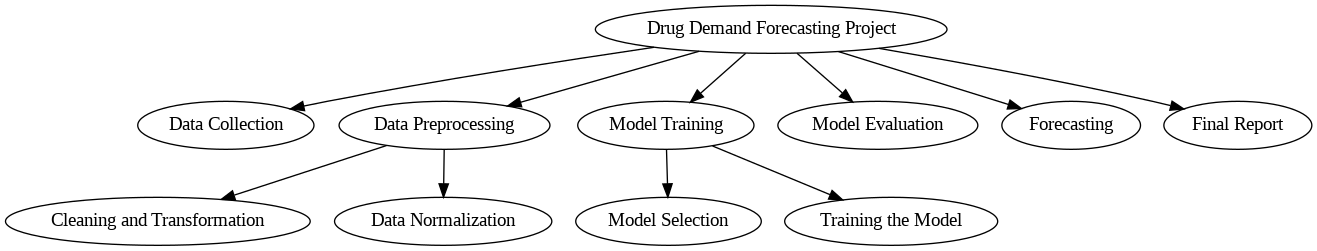

In [43]:
from IPython.display import display, Image
display(Image('WBS_Block_Diagram.png'))

In [32]:
df_s.describe()

,Hour,AceticAcidDerivatives,PropionicAcidDerivatives,SalicylicAcidDerivatives,PyrazolonesAndAnilides,AnxiolyticDrugs,HypnoticsSndSedativesDrugs,ObstructiveAirwayDrugs,Antihistamines
count,50532.000000,50532.000000,50532.000000,50532.000000,50532.000000,50532.000000,50532.000000,50532.000000,50532.000000
mean,11.500475,0.209787,0.162365,0.161723,1.246842,0.368989,0.024736,0.229732,0.120870
std,6.921706,0.556003,0.416109,0.453211,2.387392,0.930934,0.217871,1.240513,0.391999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,0.000000,0.000000,1.875000,0.000000,0.000000,0.000000,0.000000
max,23.000000,7.000000,6.000000,6.500000,29.000000,15.000000,6.000000,25.000000,5.000000


<Axes: >

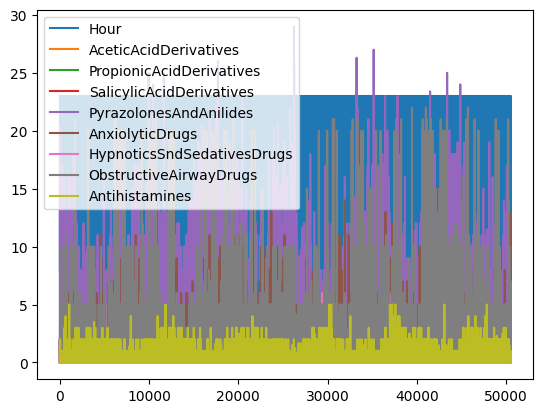

In [38]:
df_s.plot()

In [42]:
def monthlyORyears_sales(data, time=['monthly', 'years']):
    data = data.copy()

    # Assuming 'Date' is the correct column name
    date_column_name = 'Date'

    if time == "monthly":
        # Drop the day indicator from the date column:
        data[date_column_name] = data[date_column_name].apply(lambda x: str(x)[:-3])
    else:
        data[date_column_name] = data[date_column_name].apply(lambda x: str(x)[:4])

    # Sum sales per month:
    data = data.groupby(date_column_name)['Value'].sum().reset_index()  # Assuming 'Value' is the sales column
    data[date_column_name] = pd.to_datetime(data[date_column_name])

    return data

In [47]:
  print(df_s.columns)


Index(['Time', 'Year', 'Month', 'Date', 'Hour', 'Day', 'AceticAcidDerivatives',
       'PropionicAcidDerivatives', 'SalicylicAcidDerivatives',
       'PyrazolonesAndAnilides', 'AnxiolyticDrugs',
       'HypnoticsSndSedativesDrugs', 'ObstructiveAirwayDrugs',
       'Antihistamines'],
      dtype='object')


In [48]:
  print(df_s.head())

               Time  Year Month Date  Hour       Day  AceticAcidDerivatives  \
0  01-02-2014 08:00  2014     2    1     8  Thursday                    0.0   
1  01-02-2014 09:00  2014     2    1     9  Thursday                    0.0   
2  01-02-2014 10:00  2014     2    1    10  Thursday                    0.0   
3  01-02-2014 11:00  2014     2    1    11  Thursday                    0.0   
4  01-02-2014 12:00  2014     2    1    12  Thursday                    0.0   

   PropionicAcidDerivatives  SalicylicAcidDerivatives  PyrazolonesAndAnilides  \
0                      0.67                       0.4                     2.0   
1                      0.00                       1.0                     0.0   
2                      0.00                       0.0                     3.0   
3                      0.00                       0.0                     2.0   
4                      2.00                       0.0                     5.0   

   AnxiolyticDrugs  HypnoticsSndSedati

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def monthlyORyears_sales(data, time=['monthly', 'years']):
    data = data.copy()
    date_column_name = 'Date'
    if time == "monthly":
        data[date_column_name] = data[date_column_name].apply(lambda x: str(x)[:-3])
    else:
        data[date_column_name] = data[date_column_name].apply(lambda x: str(x)[:4])

    # Replace 'YourSalesColumnName' with the actual name of your sales column
    data = data.groupby(date_column_name)['Time'].sum().reset_index()
    data[date_column_name] = pd.to_datetime(data[date_column_name])
    return data

# Assuming df_s is your sales data DataFrame (replace with your actual DataFrame)
# ... (Code to load and define df_s) ...

# Get yearly sales data
y_df = monthlyORyears_sales(df_s, time="years")
y_df = y_df.rename(columns={'Value': 'sales'})

# Get monthly sales data
m_df = monthlyORyears_sales(df_s, time="monthly")
m_df = m_df.rename(columns={'Value': 'sales'})

# Plotting
layout = (1, 2)
raw = plt.subplot2grid(layout, (0, 0))
law = plt.subplot2grid(layout, (0, 1))

years = y_df.plot(x='Date', y='sales', kind="bar", color='mediumblue', label="Sales", ax=raw, figsize=(12, 5))
months = m_df.plot(x='Date', y='sales', marker='o', color='darkorange', label="Sales", ax=law)

years.set(xlabel="Years", title="Distribution of Sales Per Year")
months.set(xlabel="Months", title="Distribution of Sales Per Month")

sns.despine()
plt.tight_layout()

years.legend()
months.legend()
plt.show()

<ipython-input-60-3b464d15cf3e>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_column_name] = pd.to_datetime(data[date_column_name])


DateParseError: Unknown datetime string format, unable to parse: #VAL, at position 0